# KFold Cross validation and StratifiedKFold validation

In [2]:
import numpy as np
# load digit dataset
from sklearn.datasets import load_digits
# load 3 algos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [6]:
digit = load_digits()
type(digit)

sklearn.utils.Bunch

In [7]:
print(dir(digit))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


# Lets explore the data

In [9]:
digit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [12]:
# lets check target
np.unique(digit.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
#lets check image data
digit.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [16]:
digit.target[1]

1

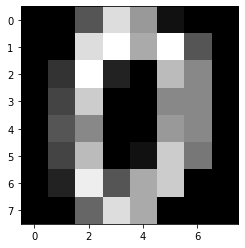

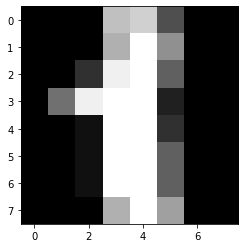

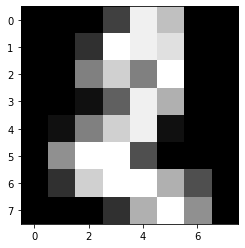

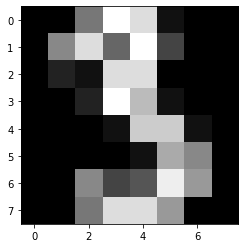

In [20]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.imshow(digit.images[i])
    plt.show()

In [21]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [23]:
print(digit.data[0])
# this ur X

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [24]:
print(digit.target[0])
# this ur y

0


# train_test_split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(digit.data,digit.target,test_size=0.3)

### Logistic Regression

In [27]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
lr.score(X_train,y_train)*100

99.68178202068417

In [28]:
lr.score(X_test,y_test)*100

95.92592592592592

## Support vector Machine

In [29]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_train,y_train)*100

99.84089101034208

## RandomForest Classifier

In [30]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)*100

100.0

# K fold

In [31]:
#Provides train/test indices to split data in train/test sets.
from sklearn.model_selection import KFold

In [32]:
#default 5 folds we have
kf = KFold(n_splits=2)

In [33]:
kf

KFold(n_splits=2, random_state=None, shuffle=False)

In [34]:
len([8,12,22,36,4,85,68,97,8,9])

10

In [36]:
list(kf.split([8,12,22,36,4,85,68,97,8,9]))

[(array([5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4])),
 (array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9]))]

In [37]:
for indices in kf.split([8,12,22,36,4,85,68,97,8,9]):
    print(indices)

(array([5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4]))
(array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9]))


In [38]:
for train_index,test_index in kf.split([8,12,22,36,4,85,68,97,8,9]):
    print('Train index:',train_index,'Test index:',test_index)

Train index: [5 6 7 8 9] Test index: [0 1 2 3 4]
Train index: [0 1 2 3 4] Test index: [5 6 7 8 9]


In [39]:
kf2 = KFold()
# default 5 folds
kf2

KFold(n_splits=5, random_state=None, shuffle=False)

In [40]:
for indices in kf2.split([8,12,22,36,4,85,68,97,8,9]):
    print(indices)

(array([2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1]))
(array([0, 1, 4, 5, 6, 7, 8, 9]), array([2, 3]))
(array([0, 1, 2, 3, 6, 7, 8, 9]), array([4, 5]))
(array([0, 1, 2, 3, 4, 5, 8, 9]), array([6, 7]))
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([8, 9]))


In [41]:
import numpy as np
a = np.array([8,12,22,36,4,85,68,97,8,9])
for train_index,test_index in kf2.split([8,12,22,36,4,85,68,97,8,9]):
    print(a[train_index],a[test_index])

[22 36  4 85 68 97  8  9] [ 8 12]
[ 8 12  4 85 68 97  8  9] [22 36]
[ 8 12 22 36 68 97  8  9] [ 4 85]
[ 8 12 22 36  4 85  8  9] [68 97]
[ 8 12 22 36  4 85 68 97] [8 9]


In [42]:
# how the data in the test is decided????
# total_no_elements / folds
len(a)/5

2.0

## If we want combined result then lets Create a model function

In [43]:
def get_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)#training
    return model.score(X_test,y_test)*100

In [44]:
#calculate testing data accuracy for random forest
get_model(rf,X_train,X_test,y_train,y_test)

97.77777777777777

In [45]:
#calculate Testing accuracy for SVM
get_model(svm,X_train,X_test,y_train,y_test)

98.70370370370371

In [46]:
print('Testing data accuracy for Logistic reg:',get_model(lr,X_train,X_test,y_train,y_test))
print('Testing data accuracy for SVM:',get_model(svm,X_train,X_test,y_train,y_test))
print('Testing data accuracy for Random Forest:',get_model(rf,X_train,X_test,y_train,y_test))

Testing data accuracy for Logistic reg: 95.92592592592592
Testing data accuracy for SVM: 98.70370370370371
Testing data accuracy for Random Forest: 97.4074074074074


In [49]:
mdl = [lr,svm,rf]
for i in mdl:
    print(i,get_model(i,X_train,X_test,y_train,y_test))

LogisticRegression(solver='liblinear') 95.92592592592592
SVC() 98.70370370370371
RandomForestClassifier() 97.4074074074074


### Now apply the same method using StratifiedKFold

In [50]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
kf.split()

In [52]:
StratifiedKFold()

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [53]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])

In [54]:
skf = StratifiedKFold(n_splits=2)

In [ ]:
skf.split()

In [57]:
#Generate indices to split data into training and test set.
list(skf.split(X,y))

[(array([1, 3]), array([0, 2])), (array([0, 2]), array([1, 3]))]

In [58]:
#lets apply kfold
list(kf.split(X))

[(array([2, 3]), array([0, 1])), (array([0, 1]), array([2, 3]))]

In [59]:
list(skf.split([8,12,22,36,4,85,68,97,8,9],[0,0,0,1,1,1,1,1,1,1]))

[(array([2, 6, 7, 8, 9]), array([0, 1, 3, 4, 5])),
 (array([0, 1, 3, 4, 5]), array([2, 6, 7, 8, 9]))]

In [60]:
for train_index,test_index in skf.split(X,y): #stratified
    print('train_index:',train_index,'test index:',test_index)
X_train, X_test = X[train_index], X[test_index]

train_index: [1 3] test index: [0 2]
train_index: [0 2] test index: [1 3]


In [61]:
for train_index,test_index in kf.split(X,y): #kfold
    print('train_index:',train_index,'test index:',test_index)
X_train, X_test = X[train_index], X[test_index]

train_index: [2 3] test index: [0 1]
train_index: [0 1] test index: [2 3]


## Use all above things in to one block

In [ ]:
kf

In [ ]:
for train_index,test_index in kf.split(digit.data):
    print(train_index,test_index)

In [64]:
kf

KFold(n_splits=2, random_state=None, shuffle=False)

In [62]:
scoreof_Logistic=[]
scoreof_SVM=[]
scoreof_rf=[]

for train_index,test_index in kf.split(digit.data):#its KFold
    X_train,X_test,y_train,y_test= digit.data[train_index],digit.data[test_index],digit.target[train_index],digit.target[test_index]
    
    scoreof_Logistic.append(get_model(LogisticRegression(solver='liblinear',multi_class='ovr'),X_train,X_test,y_train,y_test))
    scoreof_SVM.append(get_model(SVC(kernel='linear'),X_train,X_test,y_train,y_test))
    scoreof_rf.append(get_model(RandomForestClassifier(n_estimators=100),X_train,X_test,y_train,y_test))

In [63]:
scoreof_Logistic

[88.54282536151278, 91.64810690423162]

In [65]:
#average accuracy of Logisric regression
sum(scoreof_Logistic)/2

90.0954661328722

In [66]:
import numpy as np
np.mean(scoreof_Logistic)

90.0954661328722

In [67]:
scoreof_SVM

[92.99221357063404, 94.43207126948775]

In [68]:
scoreof_rf

[91.87986651835372, 92.87305122494432]

## Apply stratified kfold

In [ ]:
skf

In [69]:
scoreof_Logistic=[]
scoreof_SVM=[]
scoreof_rf=[]

for train_index,test_index in skf.split(digit.data,digit.target):#its StratifiedKFold
    X_train,X_test,y_train,y_test= digit.data[train_index],digit.data[test_index],digit.target[train_index],digit.target[test_index]
    
    scoreof_Logistic.append(get_model(LogisticRegression(solver='liblinear',multi_class='ovr'),X_train,X_test,y_train,y_test))
    scoreof_SVM.append(get_model(SVC(kernel='linear'),X_train,X_test,y_train,y_test))
    scoreof_rf.append(get_model(RandomForestClassifier(n_estimators=100),X_train,X_test,y_train,y_test))

In [70]:
scoreof_Logistic

[88.76529477196885, 91.87082405345211]

In [71]:
scoreof_rf

[93.10344827586206, 93.98663697104676]

In [72]:
scoreof_SVM

[93.32591768631812, 94.76614699331849]

## Magic of ML starts from here :-)

In [73]:
from sklearn.model_selection import cross_val_score

In [75]:
#it splits data into 5 folds by default
cross_val_score(lr,digit.data,digit.target)*100

array([92.22222222, 88.33333333, 95.26462396, 95.82172702, 89.41504178])

In [76]:
cross_val_score(lr,digit.data,digit.target,cv=4)*100

array([93.77777778, 91.09131403, 95.76837416, 90.42316258])

In [77]:
cross_val_score(svm,digit.data,digit.target,cv=3)*100

array([96.49415693, 97.9966611 , 96.49415693])

In [ ]:
cross_val_score(rf,digit.data,digit.target)*100

In [ ]:
(cross_val_score(rf,digit.data,digit.target,cv=5)*100).mean()

In [ ]:
digit.data.shape

In [ ]:
1797/10

In [ ]:
Data wrangling/muging
Feature engineering
Feature selection
Feature extraction

Assumptions of each algorithm
Acccuracy measures/Performance metrics of each algo.
Advantages/Disadvantages of each model
Cost function of each algorithm

Hypothesis testing
AB testing
P value: can we change p value?
Type I / Type II error
Bias, variance , tradeoff
Overfitting , underfitting
Undersampling, over sampling
AUC curve, ROC curve

How to improvve accuracy of a model?
When to select which algorithm??